In [1]:
from pandas_datareader import data as datareader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime

/anaconda2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data reading

In [3]:
data = pd.read_csv('aapl_dataset.csv', index_col = 'Date')

In [4]:
data = data.dropna()

In [5]:
data.tail()

,high,low,open,close,volume,adj close,feat_RSI_close,feat_OBV_volume,feat_ATR_close,feat_HT_DCPERIOD_close,feat_HT_DCPHASE_close,feat_FUNDAMENTAL1_CHG,feat_FUNDAMENTAL2_CHG,feat_K10_FILING,feat_SENTIMENT_UP,feat_DIVIDEND
Date,,,,,,,,,,,,,,,,
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924,74.436585,2.224292e+10,3.913542,28.454955,150.076370,-0.337975,0.541358,3,0,-0.982111
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602,78.678994,2.226620e+10,4.041862,28.079039,153.345130,-0.408145,0.929980,0,1,-2.587859
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831,78.405656,2.222964e+10,4.171015,27.740405,156.893808,0.162783,0.732749,3,1,0.814541
2019-12-30,292.690002,285.220001,289.459991,291.519989,36028600.0,290.829773,79.598963,2.226566e+10,4.406657,27.553361,160.727817,-0.933116,0.980977,0,0,-1.696447
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400.0,292.954712,80.999258,2.229087e+10,4.389039,27.941882,164.208211,0.383039,0.336035,1,0,0.176790


# Checking differentiation

In [6]:
test_ts = data.close.dropna().values

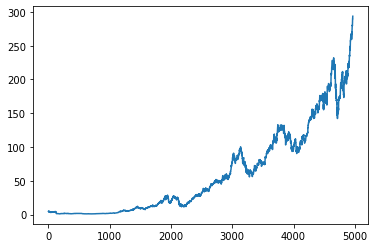

In [7]:
plt.figure()
plt.plot(test_ts)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

In [9]:
adf = lambda s: adfuller(s, autolag='AIC')
p_val = lambda s: adfuller(s, autolag='AIC')[1]

In [10]:
adf(test_ts)

(2.4738002715406058,
 0.9990409119702275,
 29,
 4938,
 {'1%': -3.4316749701517963,
  '5%': -2.862125491914587,
  '10%': -2.5670816583341},
 17198.616010838927)

In [11]:
adf(np.diff(test_ts))

(-10.253755800048758,
 4.416004081500417e-18,
 32,
 4934,
 {'1%': -3.431676044866379,
  '5%': -2.8621259667150416,
  '10%': -2.567081911089371},
 17194.60784386485)

In [12]:
adf(np.cumsum(test_ts))

(3.5839206292479138,
 1.0,
 30,
 4937,
 {'1%': -3.4316752386670926,
  '5%': -2.86212561054255,
  '10%': -2.5670817214845068},
 17187.706092958586)

In [13]:
data = pd.read_csv('aapl_dataset.csv', index_col = 'Date')

In [14]:
work_ts = data.close.values

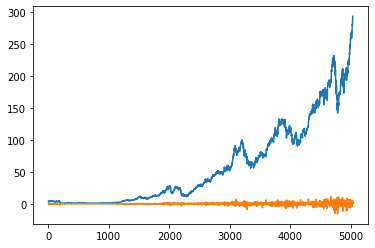

In [15]:
plt.figure()
plt.plot(work_ts)
plt.plot(np.diff(work_ts))
plt.show()

In [16]:
adf(work_ts)

(2.5089134102656874,
 0.9990526684630562,
 29,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 17355.36805578865)

In [17]:
adf(np.diff(work_ts))

(-10.313972648012083,
 3.132186267089252e-18,
 32,
 4997,
 {'1%': -3.431659318070175,
  '5%': -2.862118576928539,
  '10%': -2.567077977213785},
 17351.395427192037)

In [18]:
np.corrcoef(np.diff(work_ts), work_ts[1:])

array([[1.        , 0.06804097],
       [0.06804097, 1.        ]])

In [20]:
np.corrcoef(np.diff(np.diff(work_ts)), work_ts[2:])

array([[1.00000000e+00, 5.36657182e-04],
       [5.36657182e-04, 1.00000000e+00]])

# Fractional Differentiation 

In [21]:
from mlfinlab.features.fracdiff import frac_diff_ffd

In [22]:
adf(pd.DataFrame(data['close']))

(2.5089134102656874,
 0.9990526684630562,
 29,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 17355.36805578865)

In [23]:
adf(pd.DataFrame(data['close']).diff().dropna())

(-10.313972648012083,
 3.132186267089252e-18,
 32,
 4997,
 {'1%': -3.431659318070175,
  '5%': -2.862118576928539,
  '10%': -2.567077977213785},
 17351.395427192037)

In [24]:
rangee = np.arange(0.1, 1.1, 0.1)
adfs, corrs = [], []
for d in rangee:
    ts = frac_diff_ffd(pd.DataFrame(data['close']), d, thresh=1e-4)
    adf_i = adf(ts.dropna())[0]
    len_diff = len(data['close']) - len(ts.dropna())
    corr_i = np.corrcoef(ts.dropna().values.flatten(), data['close'].values.flatten()[len_diff:])[0][1]
    
    adfs.append(adf_i)
    corrs.append(corr_i)

In [25]:
for i in range(len(adfs)):
    print('d =', round(rangee[i], 3), 
          'ADF =', round(adfs[i], 3), 
          'Corr =', round(corrs[i], 3), 
          'ADF 95% cutoff =', -2.86)

d = 0.1 ADF = 1.61 Corr = 0.998 ADF 95% cutoff = -2.86
d = 0.2 ADF = 1.006 Corr = 0.988 ADF 95% cutoff = -2.86
d = 0.3 ADF = 0.379 Corr = 0.967 ADF 95% cutoff = -2.86
d = 0.4 ADF = -0.357 Corr = 0.927 ADF 95% cutoff = -2.86
d = 0.5 ADF = -1.257 Corr = 0.862 ADF 95% cutoff = -2.86
d = 0.6 ADF = -2.243 Corr = 0.757 ADF 95% cutoff = -2.86
d = 0.7 ADF = -3.413 Corr = 0.607 ADF 95% cutoff = -2.86
d = 0.8 ADF = -4.752 Corr = 0.437 ADF 95% cutoff = -2.86
d = 0.9 ADF = -6.526 Corr = 0.27 ADF 95% cutoff = -2.86
d = 1.0 ADF = -10.314 Corr = 0.068 ADF 95% cutoff = -2.86


In [26]:
frac_diff_series = frac_diff_ffd(pd.DataFrame(data['close']), 0.7, thresh=1e-4)

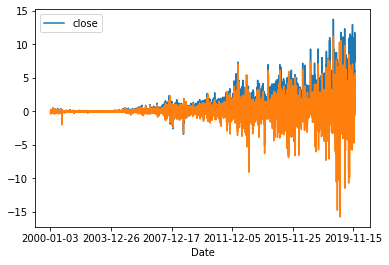

In [29]:
frac_diff_series.plot()
data['close'].diff().plot()

# Feature Importance

In [30]:
import shap
from sklearn.ensemble import RandomForestClassifier

In [31]:
WINDOW = 14
HORIZON = 7

In [32]:
data['feat_mean_frac_close'] = frac_diff_series.rolling(WINDOW).mean()
data['feat_std_frac_close'] = frac_diff_series.rolling(WINDOW).std()
data['feat_skew_frac_close'] = frac_diff_series.rolling(WINDOW).skew()
data['feat_kurt_frac_close'] = frac_diff_series.rolling(WINDOW).kurt()
data['feat_autocorr_frac_close'] = frac_diff_series.rolling(WINDOW).apply(lambda x: x.autocorr(), raw=False)

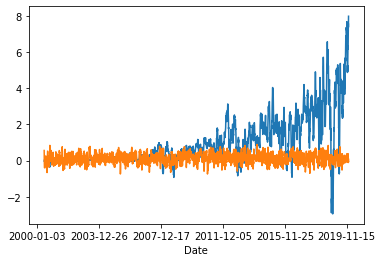

In [38]:
data['feat_mean_frac_close'].plot()
data['feat_autocorr_frac_close'].plot()

In [39]:
t = '2015-01-01'
data_train = data[:t].dropna()
data_test = data[t:].dropna()

In [40]:
FEATURE_COLUMNS = [d for d in data.columns if 'feat_' in d]

In [41]:
def createXY(inputs, outputs):   
    X, Y, P = [], [], []
    for i in range(WINDOW, len(inputs)-HORIZON, 1):

        window = inputs[i-WINDOW:i].values
        future = (outputs[i+HORIZON] - outputs[i]) / outputs[i]

        X.append(window)
        Y.append(np.sign(future))
        P.append(outputs[i])

    X, Y, P = np.array(X), np.array(Y), np.array(P)
    return X, Y, P

In [42]:
X_train, Y_train, _ = createXY(data_train[FEATURE_COLUMNS], data_train['close'])
X_test, Y_test, _ = createXY(data_test[FEATURE_COLUMNS], data_test['close'])

In [43]:
X_train_df = pd.DataFrame(X_train.mean(axis=1), columns = FEATURE_COLUMNS)
X_test_df = pd.DataFrame(X_test.mean(axis=1), columns = FEATURE_COLUMNS)

In [44]:
clf = RandomForestClassifier()
clf.fit(X_train_df, Y_train)

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train_df)

fi0 = np.abs(shap_values[0]).mean(axis=0)
fi1 = np.abs(shap_values[1]).mean(axis=0)
fi = fi0 + fi1
imp = pd.DataFrame({
    'feature': X_train_df.columns.tolist(),
    'mean': fi
})
imp = imp.set_index('feature')

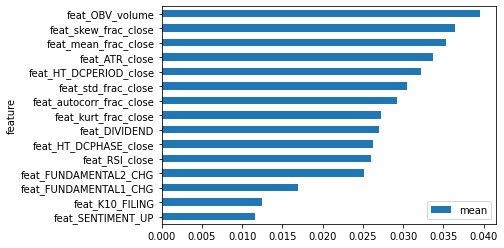

In [45]:
imp.sort_values('mean').plot.barh()